# Flight Price Prediction

## Problem Statement
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. As data scientists, we are gonna prove that given the right data anything can be predicted. Here our dataset consist of prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

## Features

- Airline: The name of the airline.

- Date_of_Journey: The date of the journey

- Source: The source from which the service begins.

- Destination: The destination where the service ends.

- Route: The route taken by the flight to reach the destination.

- Dep_Time: The time when the journey starts from the source.

- Arrival_Time: Time of arrival at the destination.

- Duration: Total duration of the flight.

- Total_Stops: Total stops between the source and destination.

- Additional_Info: Additional information about the flight

- Price: The price of the ticket

In [59]:
# importing necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from collections import Counter

## Importing Dataset

In [60]:
# loading the data

data=pd.read_excel('Flight_Fare.xlsx')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Basic checks

In [61]:
data.shape

(10683, 11)

There are 10683 instances each having 11 features

In [62]:
data.duplicated().sum()

220

In [63]:
data.drop_duplicates()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [64]:
#check for NaN values in each column

data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [65]:
data.dropna(inplace=True)
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [66]:
# information of data

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


## EDA

In [67]:
#From description we can see that Date_of_Journey is a object data type

#Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

#For this we use pandas.to_datetime to convert object data type to datetime dtype.

data['Date_of_Journey']=pd.to_datetime(data.Date_of_Journey)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  object        
 6   Arrival_Time     10682 non-null  object        
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 1001.4+ KB


In [69]:
#Extracting date,month and day from Date_of_Journey

data['Journey_Month'] = pd.DatetimeIndex(data['Date_of_Journey']).month
data['Journey_Date'] = pd.DatetimeIndex(data['Date_of_Journey']).day
data['Journey_Day'] = pd.DatetimeIndex(data['Date_of_Journey']).dayofweek

In [70]:
#Since we have obtained information from Date_of_Journey column, we can drop it.

data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [71]:
# Similar to Date_of_Journey we can extract Hour and Minutes from Dep_Time and Arrival_Time

data['Depature(h)']=pd.to_datetime(data.Dep_Time).dt.hour
data['Depature(min)']=pd.to_datetime(data.Dep_Time).dt.minute

data['Arrival(h)']=pd.to_datetime(data.Arrival_Time).dt.hour
data['Arrival(min)']=pd.to_datetime(data.Arrival_Time).dt.minute

In [72]:
# Now we can drop Dep_Time and Arrival_Time.

data.drop(['Dep_Time'],axis=1,inplace=True)
data.drop(['Arrival_Time'],axis=1,inplace=True)

In [73]:
# Converting Duration into minutes

data['Duration']=data['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

## Handling Categorical Data


#### - Ordinal Categorical data --> data are not in any order --> OneHotEncoder is used in this case

In [74]:
Counter(data.Additional_Info)

Counter({'No info': 8344,
         'In-flight meal not included': 1982,
         'No check-in baggage included': 320,
         '1 Short layover': 1,
         'No Info': 3,
         '1 Long layover': 19,
         'Change airports': 7,
         'Business class': 4,
         'Red-eye flight': 1,
         '2 Long layover': 1})

No info and No Info are the same

In [75]:
data['Additional_Info'].replace('No info', 'No Info', inplace = True)

In [76]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

data.Additional_Info=enc.fit_transform(data.Additional_Info)

In [77]:
data.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [78]:
# Route and Total_Stops are related to each other

data.drop(['Route'],axis=1,inplace=True)

 #### Nominal categorical data--> data are in order --> LabelEncoder is used in this case

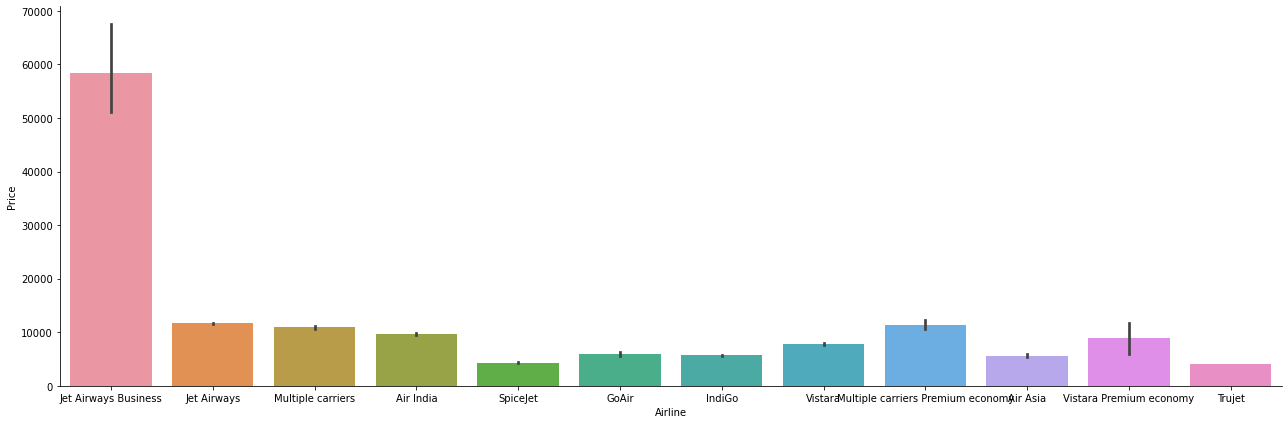

In [79]:
sb.catplot(x = 'Airline', y = 'Price' , data = data.sort_values(by = 'Price' , ascending=False),height=6, aspect=3,kind='bar')

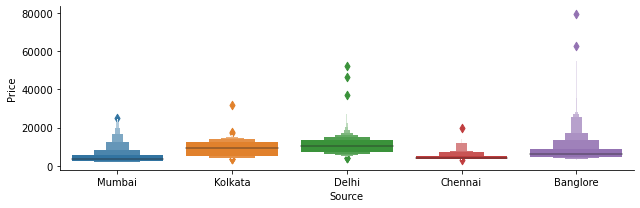

In [80]:
sb.catplot(x = 'Source', y = 'Price' , data = data.sort_values(by = 'Source' , ascending=False), height=3, aspect=3, kind='boxen')

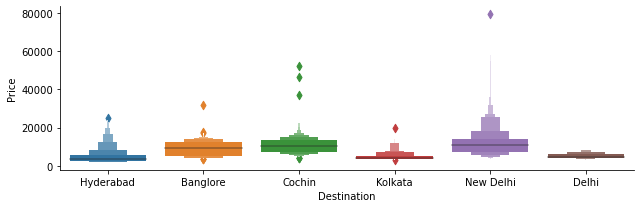

In [81]:
sb.catplot(x = 'Destination', y = 'Price' , data = data.sort_values(by = 'Source' , ascending=False), height=3, aspect=3, kind='boxen')

In [82]:
data=pd.get_dummies(data,columns=['Airline','Source','Destination'])

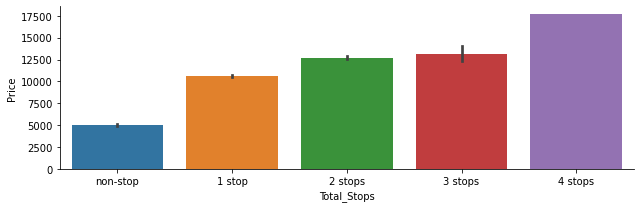

In [83]:
sb.catplot(x = 'Total_Stops', y = 'Price',data=data.sort_values('Price',ascending=True), kind='bar', height=3, aspect=3)

From the above chart we can clearly see that when the number of stop increases the ticket price also increases.

In [84]:
# Values are assigned with corresponding keys

data['Total_Stops'].replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4},inplace=True)

In [85]:
data.head()

,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Date,Journey_Day,Depature(h),Depature(min),Arrival(h),...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,0,6,3897,3,24,6,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,445,2,6,7662,1,5,5,5,50,13,...,0,0,1,0,1,0,0,0,0,0
2,1140,2,6,13882,9,6,4,9,25,4,...,0,1,0,0,0,1,0,0,0,0
3,325,1,6,6218,12,5,3,18,5,23,...,0,0,1,0,1,0,0,0,0,0
4,285,1,6,13302,1,3,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


## Feature Selection

In [86]:
data.shape

(10682, 34)

In [87]:
data.columns

Index(['Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Month',
       'Journey_Date', 'Journey_Day', 'Depature(h)', 'Depature(min)',
       'Arrival(h)', 'Arrival(min)', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [88]:
X=data.loc[:,['Duration','Total_Stops','Additional_Info', 'Journey_Month', 'Journey_Date',
       'Journey_Day', 'Depature(h)', 'Depature(min)', 'Arrival(h)',
       'Arrival(min)', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]
y=data.Price

In [89]:
X.shape

(10682, 33)

In [90]:
y.shape

(10682,)

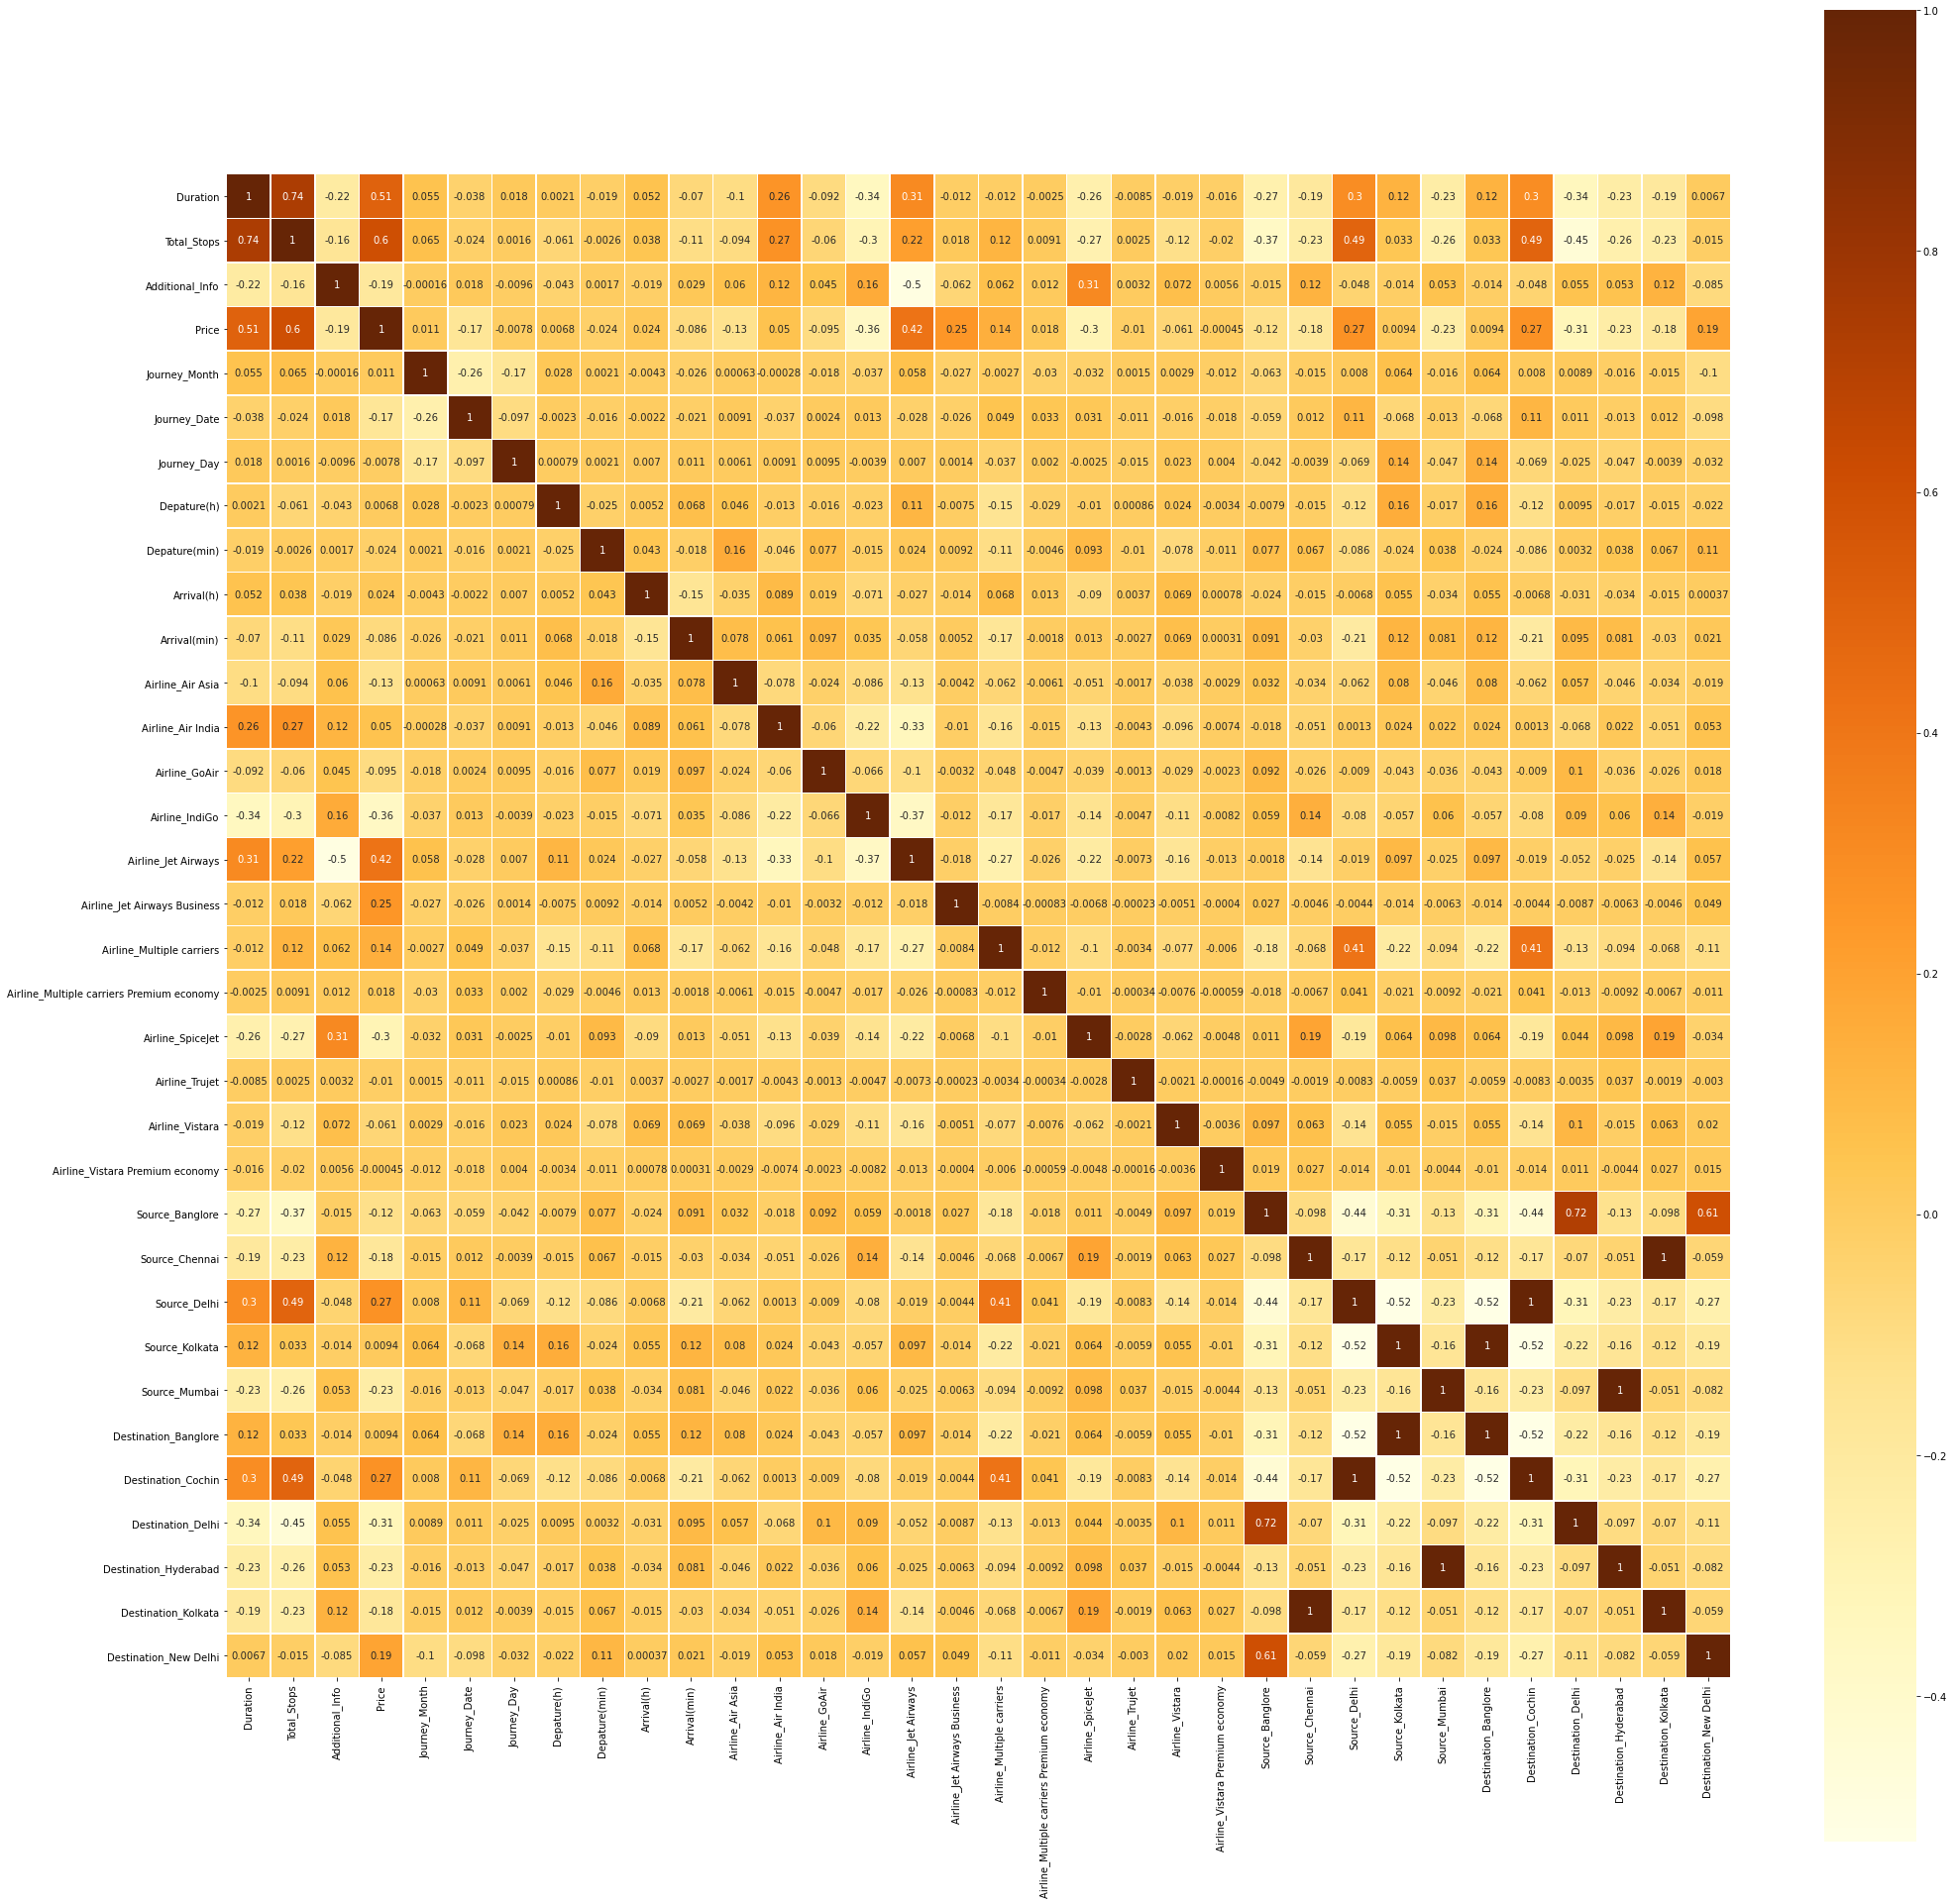

In [91]:
# Finding correlation using Seaborn Correlation Heatmap

plt.figure(figsize = (34,34))
sb.heatmap(data.corr(), annot = True,linewidths=0.5,square=True,cmap="YlOrBr")
plt.show()

In [92]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [93]:
print(selection.feature_importances_)

[1.21265855e-01 2.28997245e-01 7.53984463e-02 5.49930130e-02
 7.64121318e-02 3.11735683e-02 2.33758561e-02 2.21483222e-02
 2.61273650e-02 1.95692593e-02 2.32078573e-03 9.78073162e-03
 2.05088150e-03 1.59762159e-02 1.28131129e-01 6.48174787e-02
 1.71544505e-02 7.96717168e-04 3.39695623e-03 9.98746073e-05
 4.95050550e-03 1.09619663e-04 7.01354261e-03 4.28909869e-04
 8.97164876e-03 2.60837162e-03 4.83288775e-03 2.45802404e-03
 9.16248363e-03 1.20075963e-02 6.76479806e-03 4.43619337e-04
 1.62617106e-02]


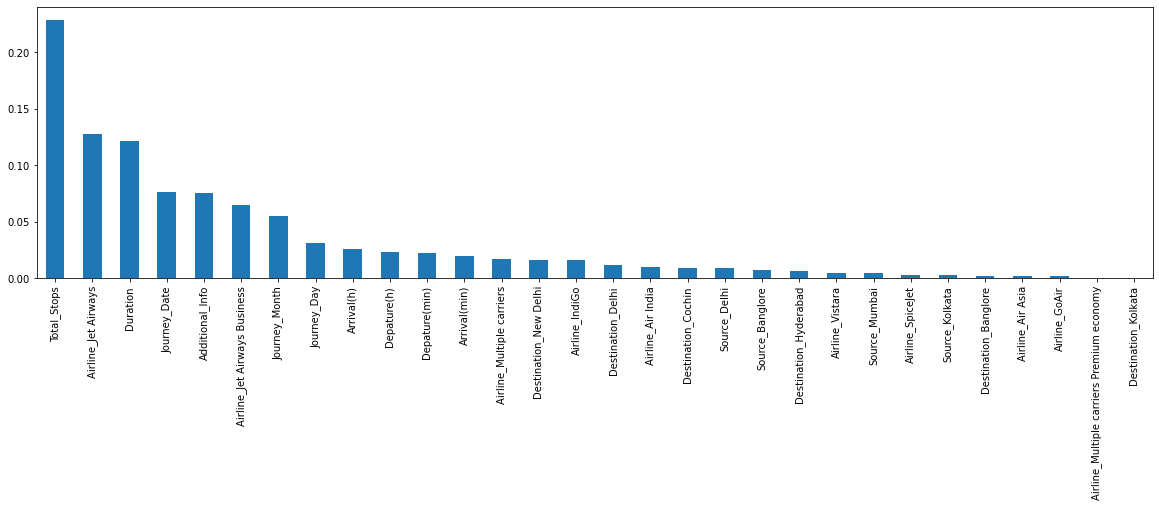

In [94]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (20,5))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='bar')
plt.show()

Above are the important features used by the model to predict the flight fare.

## Model Building
Split dataset into train and test set in order to predict w.r.t X_test

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size = 0.1,random_state=32)

### Fitting model using
1. Linear Regression
2. Random Forest
3. XGBOOST

In [96]:
# importing necessary packages

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import r2_score

### - Linear Regression

In [97]:
#Define the model

lr_model=LinearRegression()

#Train

lr_model.fit(X_train,y_train)

LinearRegression()

In [98]:
#predicting and storing output

y_predict=lr_model.predict(X_test)

In [99]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE: 1881.7764183318488
MSE: 6775641.898032503
RMSE: 2603.0063192455955


In [100]:
#comparing both y_predict and y_test

r2=r2_score(y_test,y_predict)
r2

0.6611347581691683

In [101]:
lr_model.score(X_train,y_train)

0.6301658733921438

### - Decision Tree

In [102]:
# Define the model

dt_model=DecisionTreeRegressor()

#Train

dt_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [103]:
#predicting and storing output

y_predict=dt_model.predict(X_test)

In [104]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE: 693.2419706891175
MSE: 2241086.8836399545
RMSE: 1497.0260130137867


In [105]:
#comparing both y_predict and y_test

r2=r2_score(y_test,y_predict)
r2

0.8879181544394962

In [106]:
dt_model.score(X_train,y_train)

0.9959024531288744

### - Random Forest

In [107]:
#Define the model

rf_model=RandomForestRegressor()

#Train

rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [108]:
#predicting and storing output

y_predict=rf_model.predict(X_test)

In [109]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE: 631.090700005197
MSE: 1434967.137269454
RMSE: 1197.9011383538518


In [110]:
#comparing both y_predict and y_test

r2=r2_score(y_test,y_predict)
r2

0.9282340340136174

In [111]:
rf_model.score(X_train,y_train)

0.9822088053581041

### - XGBOOST

In [112]:
#Define the model

xgb_model=XGBRegressor(n_estimators=200,learning_rate=0.25)

#Train

xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.25, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [113]:
#predicting and storing output

y_predict=xgb_model.predict(X_test)

In [114]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE: 663.2227555962786
MSE: 1230717.6093152736
RMSE: 1109.3771267316058


In [115]:
#comparing both y_predict and y_test

r2=r2_score(y_test,y_predict)
r2

0.9384490168485462

In [116]:
xgb_model.score(X_train,y_train)

0.9826330569302969

In [117]:
#Adjusted RSquared of the model

n=len(data) #number of records
p=len(data.columns)-2 #number of features .i.e. columns excluding uniqueId and target variable
adjr= 1-(1-r2)*((n-1)/(n-p-1))
print(adjr)

0.9382640575602706


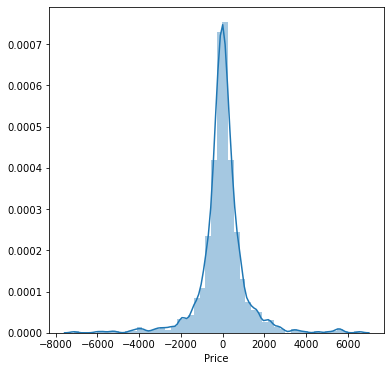

In [118]:
plt.figure(figsize = (6,6))
sb.distplot(y_test-y_predict)
plt.show()